In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from scipy.interpolate import interp2d
from scipy.stats import norm

In [2]:
def new_board(x, y, num_live_A=2, num_live_B = 1, num_dead_cells=3):
    """Initializes a board for Conway's Game of Life"""
    board = []
    for i in range(0, y):
        row = []
        for j in range(0, x):
            cell_type = random.choice([0] * num_dead_cells + [1] * num_live_A + [2] * num_live_B)
            row.append(cell_type)
        board.append(row)
        # Defaults to a 3:2 dead cell:live cell ratio
        # board.append([random.choice([0] * num_dead_cells + [1] * num_live_A + [2] * num_live_B) for _ in range(0, x)])
    return board

def get(board, x, y):
    """Return the value at location (x, y) on a board, wrapping around if out-of-bounds"""
    #Retorna el valor de la locación (x, y) en el tablero, envolviendo los que están fuera de los bordes
    return board[y % len(board)][x % len(board[0])] 


def assign(board, x, y, value):
    """Assigns a value at location (x, y) on a board, wrapping around if out-of-bounds"""
    #Función que asigna el tipo de celula en la posición del tablero
    board[y % len(board)][x % len(board[0])] = value


def count_neighbors(board, x, y, cell_type):
    """Counts the number of living neighbors a cell at (x, y) on a board has"""
    neighbors = [
        get(board, x - 1, y),
        get(board, x + 1, y),
        get(board, x, y - 1),
        get(board, x, y + 1),
        get(board, x + 1, y + 1),
        get(board, x + 1, y - 1),
        get(board, x - 1, y + 1),
        get(board, x - 1, y - 1)
    ]

    return neighbors.count(cell_type)


def process_life(board):
    """Creates the next iteration from a passed state of Conway's Game of Life"""
    next_board = new_board(len(board[0]), len(board))
    for y in range(0, len(board)):
        for x in range(0, len(board[y])):
            num_A_neighbors = count_neighbors(board, x, y, 1)
            num_B_neighbors = count_neighbors(board, x, y, 2)
            cell_type = get(board, x, y)
            
             
            #Condición nacimiento célula tipo A
            if cell_type == 0 and num_A_neighbors == 3 and num_B_neighbors <=2: #Célula muerta
                assign(next_board, x, y, 1)
            #Condición nacimiento célula tipo B
            elif cell_type == 0 and num_B_neighbors == 3 and num_A_neighbors <=2: 
                assign(next_board, x, y, 2)

            #Condición de supervivencia Célula tipo A 
            elif cell_type == 1 and 2 <= num_A_neighbors <= 3 and num_B_neighbors <= 2:
                assign(next_board, x, y, 1)
            #Condición de muerte célula tipo A
            elif cell_type == 1 and num_A_neighbors < 2 or num_A_neighbors > 3 or num_B_neighbors > 2:
                assign(next_board, x, y, 0)
            #Condición adicional de competencia para la célula tipo A
            elif cell_type == 1 and num_B_neighbors > num_A_neighbors:
                assign(next_board, x, y, 2) #Célula A fagocitada por B
            
            #Condición de supervivencia Célula tipo B
            elif cell_type == 2 and 2 <= num_B_neighbors <= 3 and num_A_neighbors <= 2:
                assign(next_board, x, y, 2)
            #Condición de muerte célula tipo B
            elif cell_type == 2 and num_B_neighbors < 2 or num_B_neighbors > 3 or num_A_neighbors > 2:
                assign(next_board, x, y, 0)
            #Condición adicional de competencia para la célula tipo B
            elif cell_type == 2 and num_A_neighbors > num_B_neighbors:
                    assign(next_board, x, y, 1) #Célula B fagocitada por A
            # else:
            #     assign(next_board, x, y, 0)
    return next_board

In [3]:
def draw_board(board):
    res = ''
    for row in board:
        for col in row:
            if col == 1:
                res += '# '
            elif col == 2:
                res += '$ '
            else:
                res += ' '
        res += '\n'
    return res


BOARD_SIZE = 30
NUM_ITERATIONS = 1000

Cell_A_history = []
Cell_B_history = []

board = new_board(BOARD_SIZE, BOARD_SIZE)

for i in range(0, NUM_ITERATIONS):
    num_A = sum(row.count(1) for row in board)/NUM_ITERATIONS
    num_B = sum(row.count(2) for row in board)/NUM_ITERATIONS
    Cell_A_history.append(num_A)
    Cell_B_history.append(num_B)
    print('Iteration ' + str(i + 1))
    board = process_life(board)
    res = draw_board(board)
    print(res)
    time.sleep(0.002)
    clear_output(wait=True)

Iteration 1000
# #   # #     # #  # $ # #  # # #   #  # # # # # 
 # #  #   #  # # # # #      # #  #  #    # # 
# # # #    # $     # # #      # # $  # # # #  
# # # # # #   $   # # # #      #  #  # $ #   # 
#        #  # #  # #    #    # # #   # # # 
  #  # #  # #  # # $ $ # #       # #  # #  #  
    # # #   # $   #      # #  # # #  #  #  
  # #   $   $ #   # #    # #     #  #  #  
    # $ # # #  # # #   # # $     #   #    # 
       # #  #    #   #   # $ #  # # #  $  
# #  # # # # #     #  # # $ # #    $    # # # # 
# # $ $ #  #  $  # #      # # #   #   #  #  # 
 # #  #           #   #       #  #   
 $ $  $ # #  #       # # #  #     $ $ $  # # 
#  # #    # #       # #   # #   $ #   # # # 
#  #      #     # # # $   # # # $ # # # #    
# # # $  #  #  # #   # #  $ $ $ #  # # # #    # # 
 #  # $   #   $ #   # $ # $ $  $ # # # # # #  # # 
  $ # # # # #     #     #  # #  #  # #  # #  
 $ #  #  # #  #   # #     #    #    # $   
$ # #    #   #             #   # # $   
#      $ #    # #  #      

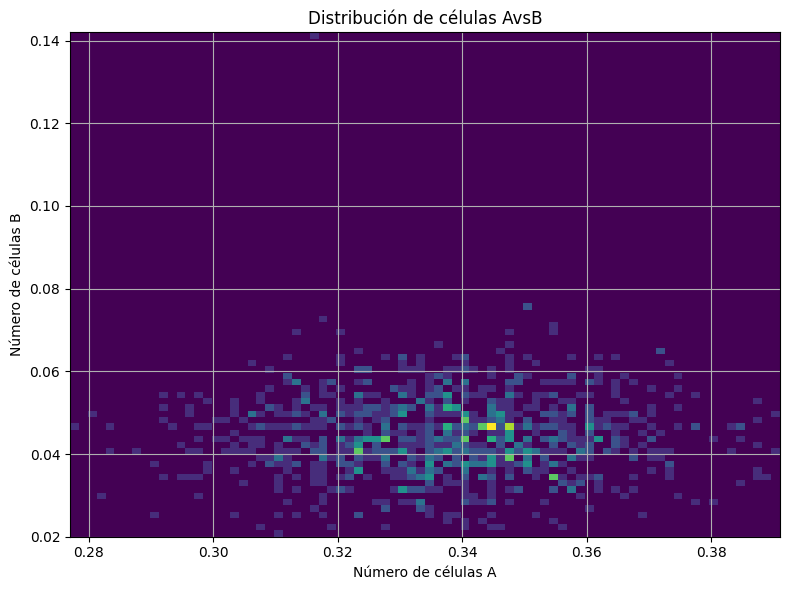

In [5]:
plt.figure(figsize=(8, 6))
hist, xedges, yedges, _ = plt.hist2d(Cell_A_history, Cell_B_history, bins=(80,80), density=True)
plt.title('Distribución de células AvsB')
plt.xlabel('Número de células A')
plt.ylabel('Número de células B')
#axs[0].set(xlim=(-2, 2))#, ylim=(-3, 3))
plt.grid(True)

plt.tight_layout()
plt.show()

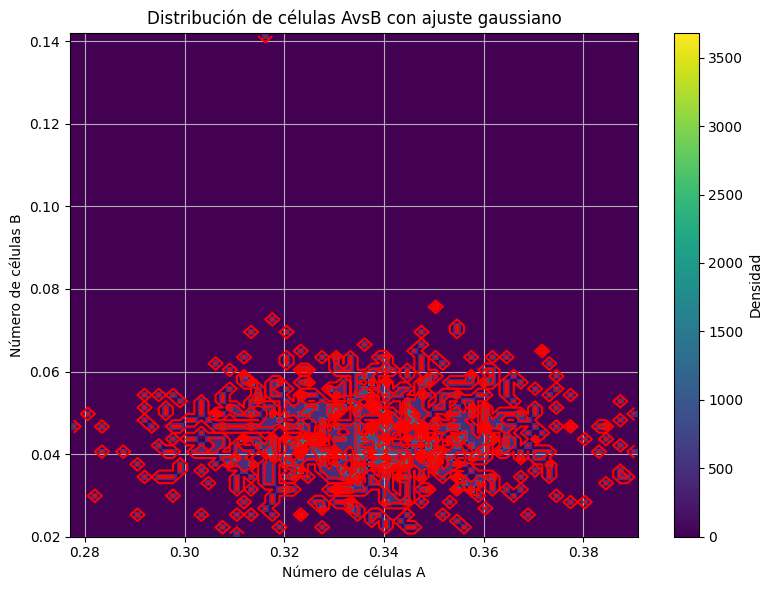

In [21]:


# Suponiendo que Cell_A_history y Cell_B_history son los datos de las células A y B
data = np.column_stack((Cell_A_history, Cell_B_history))

# Histograma 2D
hist, xedges, yedges = np.histogram2d(Cell_A_history, Cell_B_history, bins=(80, 80), density=True)

# Coordenadas de las celdas
x_centers = 0.5 * (xedges[:-1] + xedges[1:])
y_centers = 0.5 * (yedges[:-1] + yedges[1:])

# Ajuste de una distribución gaussiana a los datos del histograma
mu, std = norm.fit(data)

# Función de densidad de probabilidad (PDF) de la distribución gaussiana
pdf = norm.pdf(np.linspace(min(Cell_A_history), max(Cell_A_history), 100), mu, std)

# Visualización del histograma y la distribución ajustada
plt.figure(figsize=(8, 6))
plt.hist2d(Cell_A_history, Cell_B_history, bins=(80, 80), density=True, cmap='viridis')
plt.colorbar(label='Densidad')
plt.contour(x_centers, y_centers, hist.T, levels=10, colors='r')
plt.plot(np.linspace(min(Cell_A_history), max(Cell_A_history), 100), pdf, 'k--', linewidth=2)
plt.title('Distribución de células AvsB con ajuste gaussiano')
plt.xlabel('Número de células A')
plt.ylabel('Número de células B')
plt.grid(True)
plt.tight_layout()
plt.show()

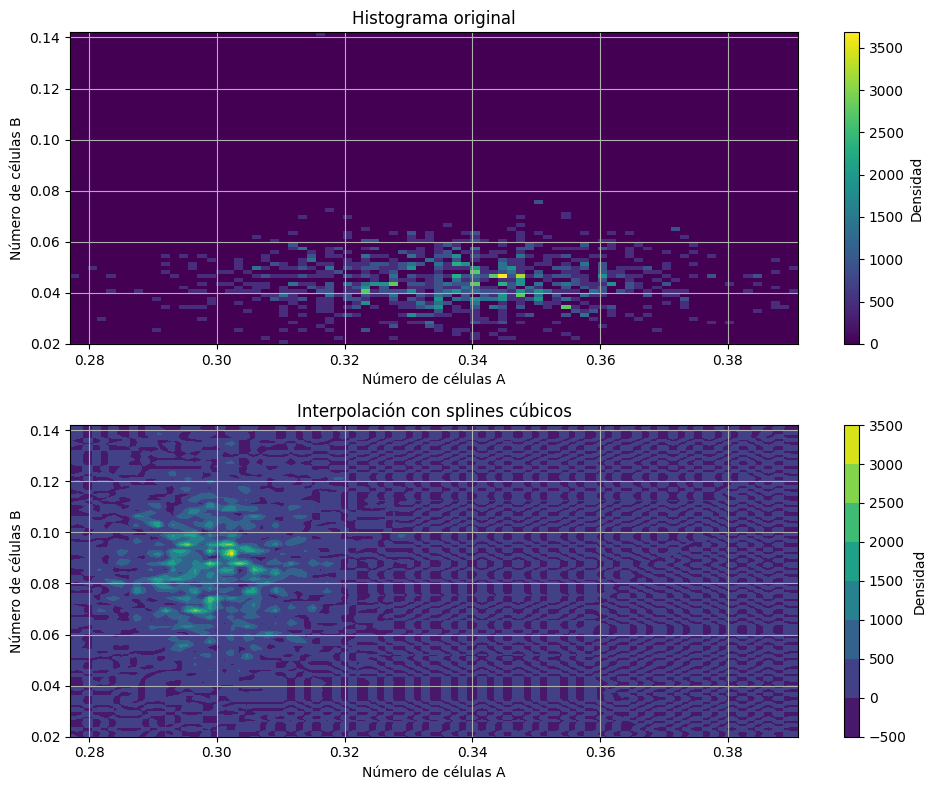

In [23]:
# Suponiendo que Cell_A_history y Cell_B_history son los datos de las células A y B
data = np.column_stack((Cell_A_history, Cell_B_history))

# Histograma 2D
hist, xedges, yedges = np.histogram2d(Cell_A_history, Cell_B_history, bins=(80, 80), density=True)

# Coordenadas de las celdas
x_centers = 0.5 * (xedges[:-1] + xedges[1:])
y_centers = 0.5 * (yedges[:-1] + yedges[1:])

# Función de interpolación con splines cúbicos
interp_func = interp2d(x_centers, y_centers, hist, kind='cubic')

# Generar una malla de puntos para evaluar la función interpolada
x_grid, y_grid = np.linspace(min(Cell_A_history), max(Cell_A_history), 100), np.linspace(min(Cell_B_history), max(Cell_B_history), 100)
z_interp = interp_func(x_grid, y_grid)

# Visualización del histograma original y la interpolación con splines cúbicos
plt.figure(figsize=(10, 8))

# Histograma original
plt.subplot(2, 1, 1)
plt.hist2d(Cell_A_history, Cell_B_history, bins=(80, 80), density=True, cmap='viridis')
plt.colorbar(label='Densidad')
plt.title('Histograma original')
plt.xlabel('Número de células A')
plt.ylabel('Número de células B')
plt.grid(True)

# Interpolación con splines cúbicos
plt.subplot(2, 1, 2)
plt.contourf(x_grid, y_grid, z_interp, cmap='viridis')
plt.colorbar(label='Densidad')
plt.title('Interpolación con splines cúbicos')
plt.xlabel('Número de células A')
plt.ylabel('Número de células B')
plt.grid(True)

plt.tight_layout()
plt.show()